In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats

from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

sns.set_style("white")

In [2]:
crime_feats = pd.read_csv('crime_features.csv')
crime_feats.head()

,city,population,Pop Squared,Robbery,Murder,Propertycrime,Violent,Assult
0,Adams Village,1861.000,3463321.000,0,0,12.000,0.000,0.000
1,Addison Town and Village,2577.000,6640929.000,0,0,24.000,3.000,3.000
2,Akron Village,2846.000,8099716.000,0,0,16.000,3.000,3.000
3,Albany,97956.000,9595377936.000,1,1,4090.000,791.000,526.000
4,Albion Village,6388.000,40806544.000,1,0,223.000,23.000,16.000


In [3]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_feats['Propertycrime'].values.reshape(-1, 1)
X = crime_feats[['population', 'Pop Squared', 'Robbery', 'Murder', 'Violent', 'Assult']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 2.40082083e-02 -1.05939135e-07  2.79905345e+01 -1.36507017e+01
  -4.23954462e+00  1.09438150e+01]]

Intercept: 
 [-71.7225809]

R-squared:
0.8471090231753682


With population, poulation squared, robbery, murder, violent crimes, and aggrevated assult this model explains 84.7% of variance in property crimes. From the coefficients it seems that property crime has the biggest per occurance increase when there are more murders.

## Check Assumptions

### Assumption One: Linear Relationship

Scatterplots

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


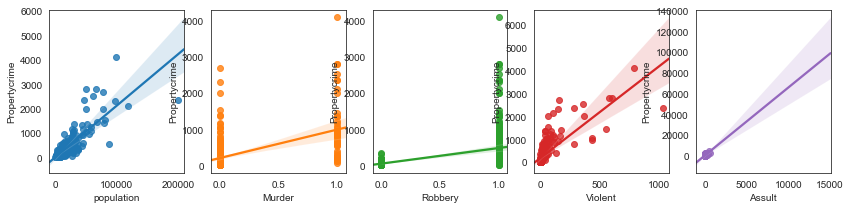

In [4]:
# Set variables
X_plot = ['population', 'Murder', 'Robbery', 'Violent', 'Assult']
Y_plot = 'Propertycrime'

# Define the scatterplot function
def plot_scat(frame, X, Y):
    fig, axes = plt.subplots(1, len(X), figsize=(14,3))
    for var in X:
        idx = X.index(var)
        sns.regplot(y=frame[Y], x=frame[var], ax=axes[idx])

plot_scat(crime_feats, X_plot, Y_plot)

The features are all fairly linear to property crime.


### Assumption two: multivariate normality

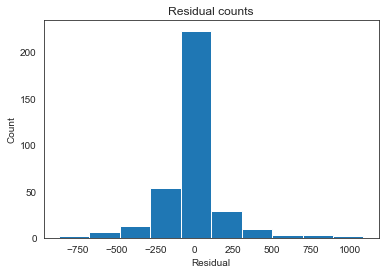

In [5]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime_feats['Propertycrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

There's a slight tail to the right, but overall the data is quite normal.

### Assumption three: homoscedasticity

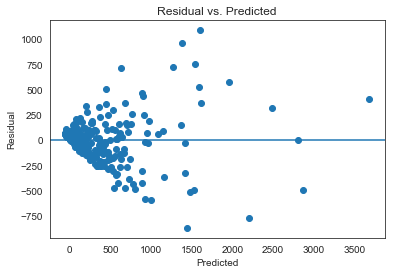

In [6]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

I'm going to transform the dependent variable (property crime)

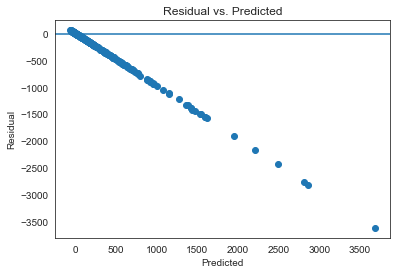

In [9]:
# take the square root of the property crime data then re-plot
prop_crm = crime_feats['Propertycrime']
crime_feats['sqrt_property'] = [math.sqrt(x) for x in  prop_crm]

#X = crime_feats[['population', 'Pop Squared', 'Robbery', 'Murder', 'Violent', 'Assult']]

#predicted = regr.predict(X).ravel()
actual2 = crime_feats['sqrt_property']

# Calculate the error, also called the residual.
residual2 = actual2 - predicted

#plot
plt.scatter(predicted, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Now the error terms are distributed homoscedastically.

### Assumption four: low multicollinearity

Check for correlations

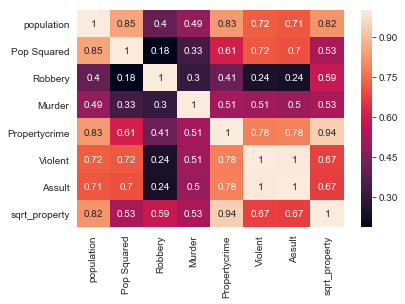

In [10]:
sns.heatmap(crime_feats.corr(), annot=True)
plt.show()

Population has the most correlation with property crime (more than population squared), followed by violent crimes and assult.

In [17]:
# Run an updated model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y3 = crime_feats['Propertycrime'].values.reshape(-1, 1)
X3 = crime_feats[['Pop Squared', 'Robbery', 'Murder', 'Violent', 'Assult']]
regr.fit(X3, Y3)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X3, Y3))


Coefficients: 
 [[ 2.55431669e-08  2.25901485e+02  1.91058279e+02 -3.01071276e+00
   9.77847782e+00]]

Intercept: 
 [30.33465447]

R-squared:
0.686073042522082


Removing the population feature actually drops the R squared valued by about 16 percentage points. So keeping the original features and target as-is may be the best idea for the model